In [25]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="deepseek-r1-distill-llama-70b")
response=llm.invoke("what is today whether in Narsipatnam in andhrapradesh district  take whether details from google?")

In [26]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the weather in Narsipatnam, which is in the Andhra Pradesh district. The user wants me to take the weather details from Google. Hmm, but wait, I can't access the internet in real-time, so I can't directly fetch the current weather data. \n\nFirst, I should let the user know that I can't provide real-time data. Maybe I can suggest they check Google for the latest updates. Alternatively, I can guide them on how to find the information themselves. \n\nI should also explain that if they provide me with specific data, like the date or any other details, I can help them interpret it. That way, I'm still being helpful without overstepping my capabilities. \n\nI need to make sure my response is clear and friendly, so the user doesn't feel stuck. Maybe I can mention using Google search or the Google weather app as a reliable source. \n\nAlso, perhaps I can suggest alternative methods, like checking a weather website or using a smartphone

In [27]:
from langchain.tools import tool

In [28]:
@tool
def multiply(a:int , b:int)->int :
  "multiplication happens here"
  return a*b



In [29]:
@tool
def divide(a:int , b:int)->int :
    "division happens here"
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

In [30]:
@tool
def add(a: int, b: int) -> int:
    " Add two integers."
    return a + b

In [31]:
%pip install -U duckduckgo-search

Note: you may need to restart the kernel to use updated packages.


In [32]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [33]:
tools=[add,multiply,divide,search]

In [34]:
llm_with_tools=llm.bind_tools(tools)

In [44]:
response=llm_with_tools.invoke("what is today whether in Narsipatnam in andhrapradesh district  take whether details from google?")

In [37]:
from langchain.tools import tool
from langchain_community.tools import tool

In [41]:
response=llm_with_tools.invoke("hi")

In [45]:
response.content

''

In [46]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'weather in Narsipatnam Andhra Pradesh today'},
  'id': 'ns5svvkn9',
  'type': 'tool_call'}]

In [47]:
response=llm_with_tools.invoke("what is 2+2?")

In [48]:
response.content

''

In [49]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': '98xdf3hj4',
  'type': 'tool_call'}]

In [50]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [51]:
user_query=["tell me what is 2+2"]

In [52]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [53]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [54]:
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }
    
    

In [55]:
builder=StateGraph(MessagesState)

In [56]:
builder.add_node("llm_decision_step",function_1)

In [57]:
tools

[StructuredTool(name='add', description='Add two integers.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000002A92173EA20>),
 StructuredTool(name='multiply', description='multiplication happens here', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002A92173CC20>),
 StructuredTool(name='divide', description='division happens here', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000002A92173CB80>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [58]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [59]:
builder.add_edge(START,"llm_decision_step")

In [60]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)


In [61]:
builder.add_edge("tools","llm_decision_step")

In [62]:
react_graph=builder.compile()

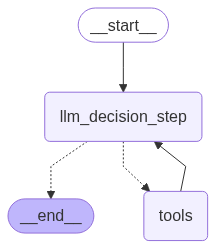

In [63]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [64]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [65]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='0ad5b991-cd2d-4c16-a8bb-35e63f09310e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 't0n5h088e', 'function': {'arguments': '{"query":"Narendra Modi age 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 234, 'prompt_tokens': 304, 'total_tokens': 538, 'completion_time': 0.850909091, 'prompt_time': 0.027012253, 'queue_time': 0.05401908699999999, 'total_time': 0.877921344}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7741e907-8e60-4615-bc15-2782f5a303ae-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age 2023'}, 'id': 't0n5h088e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 304, 'output_tokens': 234, 'total_tokens': 538}),
  ToolMessage(co

In [66]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [67]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='2843f79a-5c7d-4b38-bef0-cd15c0eee4d9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'c4xgz4m3z', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 163, 'prompt_tokens': 308, 'total_tokens': 471, 'completion_time': 0.592727273, 'prompt_time': 0.028692988, 'queue_time': 0.054145161, 'total_time': 0.621420261}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0ade01ca-d22e-4bd7-bc30-6b237b8a36ab-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'c4xgz4m3z', 'type': 'tool_call'}], usage_metadata={'input_tokens': 308, 'output_tokens': 163, 'total_tokens': 471}),

In [68]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [69]:
response=react_graph.invoke({"messages":message})

In [70]:
response["messages"][-1].content

'The speed of light in meters per second is approximately **299,792,458 m/s**. When multiplied by 10, the result is **2,997,924,580 m/s**.'

In [71]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (0kb09zm04)
 Call ID: 0kb09zm04
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
================================== Ai Message ==================================
Tool Calls:
  multiply (a32thhzf0)
 Call ID: a32thhzf0
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
================================== Ai Message ==================================
Tool Calls:
  multiply (sf4h6h45y)
 Call ID: sf4h6h45y
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
========================

In [73]:
%pip install yfinance

  Using cached pandas-2.3.0-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------- -------------------------- 1.0/3.0 MB 6.3 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 4.6 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 4.4 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 4.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -----------

In [74]:
import yfinance as yf

In [75]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     
    

In [76]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $201.00.'

In [77]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $328.49.'

In [78]:
tools

[StructuredTool(name='add', description='Add two integers.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000002A92173EA20>),
 StructuredTool(name='multiply', description='multiplication happens here', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002A92173CC20>),
 StructuredTool(name='divide', description='division happens here', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000002A92173CB80>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [79]:
tools = [add, multiply, divide, search,get_stock_price]

In [80]:
llm_with_tools=llm.bind_tools(tools)

In [81]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [82]:
response.content

''

In [83]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': '9xg42tz37',
  'type': 'tool_call'}]

In [84]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [85]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

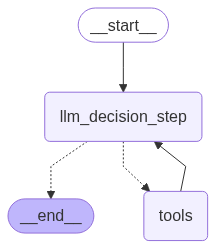

In [86]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [89]:
messages = [HumanMessage(content="add 10 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})


In [90]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 10 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (swwhk5293)
 Call ID: swwhk5293
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================
Tool Calls:
  add (r7df05pgz)
 Call ID: r7df05pgz
  Args:
    a: 201
    b: 10
================================= Tool Message =================================
Name: add

211
================================== Ai Message ==================================

The result of adding 10 to the current stock price of Apple (AAPL), which is $201.00, is:

**211**


In [91]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [92]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me 2 times of current stock price of Apple with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (6sjt3jhs9)
 Call ID: 6sjt3jhs9
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (7da6w98hc)
 Call ID: 7da6w98hc
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (yed3cv8cj)
 Call ID: yed3cv8cj
  Args:
    ticker: AAPL
===========================